Urban Data Science & Smart Cities <br>
URSP688Y Spring 2025<br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

# Exercise04

This last exercise is an opportunity for you to get started on your final project. Please identify a portion of your project to get started on and submit a notebook (and any other related files) where you:

1. State the question you are aiming to address with this portion of your analysis
2. Outline the approach you will use to answer that question (pseudocode or you can start to more formally outline the approach section for your final narrative)
3. Operationalize your approach with data and code that you can later slot into your final analysis

## Submitting

Please make a pull request with all of your code and reasonably-sized data in a folder with your first name. See the example with my name in the `exercise04` directory.

If you have datasets that are too large for GitHub or should not be made public, please upload them to a cloud location (e.g., Google Drive) to which I (and ideally your classmates) have access. Please also provide instructions for how someone running your code should properly locate or connect to these files so the analysis will run properly. For example, should they copy and paste the files into the same directory as your notebook, or a provided `data` directory? Best practice is to include these instructions in a separate ReadMe.md or ReadMe.txt file, or at the top of your notebook.

In [9]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os



In [64]:
# Load datasets and make sure zip codes are stored as strings without decimals

store_locations_csv_df = pd.read_csv('/Users/NancyBowne/Downloads/Grocery_Store_Locations.csv')
store_locations_csv_df['ZIPCODE'] = store_locations_csv_df['ZIPCODE'].astype('Int64').astype('string')
#print (store_locations_csv_df)



In [14]:
# How many store locations are we working with?
len(store_locations_csv_df) 


91

In [17]:
low_food_area_csv_df = pd.read_csv('/Users/NancyBowne/Downloads/Low_Food_Access_Areas.csv')
#low_food_area_csv_df['ZIPCODE'] = low_food_area_csv_df['ZIPCODE'].astype('Int64').astype('string')
#print (low_food_area_csv_df)


1. State the question you are aiming to address with this portion of your analysis


    My project will assess food distribution in Washington, D.C., exploring if food waste and food insecurity can reach an equilibrium to properly provide for the population.

   a. How does D.C. food reach an equilibrium?: I will assess the size, type, and potential quantity of food provided and food wasted at each grocery store in D.C. (abstract)
   
   b. How long has each area had a grocery store?: I will collect information on the duration of each grocery store's existence in D.C., to measure if there has been a proper distribution of grocery stores over time. This step aims to learn if the city is making progress to mitigate food deserts, and where are new grocery stores going (prove/disprove Hotelling principle- stores try to agglomerate in spaces in order to steal markets)


*For this portion of the analysis, I will mainly focus on setting the groundwork for part b. 

  








2. Outline the approach you will use to answer that question (pseudocode or you can start to more formally outline the approach section for your final narrative)


a. D.C. food equilibrium: 
     1. Estimate food supply and food waste from grocery store size 
     2. Find population size 
     3. Measure food insecurity (USDA Food Environment Atlas) 
     4. Measure access to farmers' markets (USDA Food Environment Atlas) 
     5. Create a script to change parameters and create a dashboard with different inputs (grocery store location, food insecurity, general location, farmers' markets) 
     *Solidify the connection between food waste and food insecurity (are they related due to access or proximity)
     *The dashboard could be grocery stores, and categorize by size, cost, type, location 
     

b. Grocery store histroy: 
    1. Use store_locations_csv_df to track grocery store locations from 1990- 2025 using variables PRESENT90- PRESENT25 (make a table) 
    2. Create a choropleth graph to contrast colors over time of grocery store access in D.C. 
    3. Sort grocery stores by type, location, size 
    4. Manage blank and NA values for unknown duration-creation of a grocery store in D.C. (in dataset, appears blank) 




3. Operationalize your approach with data and code that you can later slot into your final analysis

(see loaded datasets and some code below) 

For Part B, each of the 91 locations will be included in a frequency table and choropleth map to compare how many years it was a present grocery store location, from 1995 to 2025 (some years skipped in 1990s, 2000s). The choropleth map will feature darker colors based on more years of being open and a lighter color of fewer years of being open. The dataset's present yes/no/blank has also become an integer through assigned numbers 2/1/0. Each grocery store location will be a color on the map, with a total of 20-25 (years) being the darkest, and 0-4 being the lighest. This study does not accoint for whether there has always been a location in that area. For example, for a few years, the same location could have been a grocery store A, then became grocery store B. This dataset does not account for that, unless looking at specific address.

In [35]:
#Part B: grocery store history choropleth map 

crs = 26918 # UTM18
store_location_history = gpd.read_file("/Users/NancyBowne/Downloads/Grocery_Store_Locations.geojson").to_crs(crs)
#print(store_locations_json_gdf)

tracts = gpd.read_file("/Users/NancyBowne/Downloads/dc_tracts.geojson").to_crs(crs)
# Restrict to tract-level features, which have geoids 18 characters long
tracts = tracts[tracts.geoid.str.len() == 18]




In [36]:
#View variables of store_location_history

#store_location_history.columns.tolist()



<Axes: >

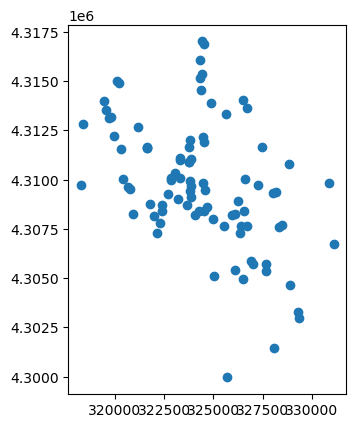

In [37]:
store_location_history.plot() #accesible to plot

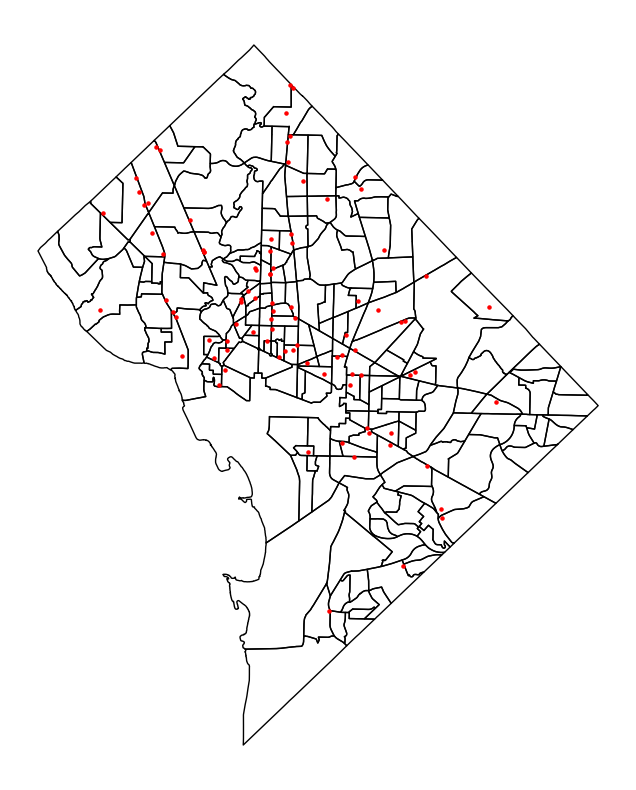

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = tracts.plot(ax=ax, facecolor='none', edgecolor='k', zorder=0)
store_location_history.plot(ax=ax, markersize=5, color='r', zorder=1)
ax.axis('off')

plt.savefig('large_scale_map.eps')

plt.show() #DC map with grocery store locations

In [ ]:
#Next step is to visualize how long each location has been around from 1990-2025
#Below code is for histogram

In [48]:
print(store_location_history.columns.tolist())

['STORENAME', 'ADDRESS', 'ZIPCODE', 'PHONE', 'WARD', 'SSL', 'NOTES', 'PRESENT90', 'PRESENT95', 'PRESENT00', 'PRESENT05', 'PRESENT08', 'PRESENT09', 'PRESENT10', 'PRESENT11', 'PRESENT12', 'PRESENT13', 'PRESENT14', 'PRESENT15', 'PRESENT16', 'PRESENT17', 'PRESENT18', 'PRESENT22', 'PRESENT23', 'PRESENT24', 'PRESENT25', 'GIS_ID', 'XCOORD', 'YCOORD', 'MAR_ID', 'SE_ANNO_CAD_DATA', 'GLOBALID', 'CREATED', 'EDITED', 'OBJECTID', 'geometry', 'index_right', 'geoid']


In [51]:
#PRESENT90 thru PRESENT25 are strings, not int. Will explore how to make them ints for the map
#blank/unknown = 0
#no = 1
#yes = 2

#store_location_history['PRESENT90'] = store_location_history['PRESENT90'].map({
  #  'yes': 2,
  #  'no': 1,
  #  '': 0
#})


#store_location_history.columns = store_location_history.columns.str.strip()


present_columns = [
    'PRESENT90', 'PRESENT95', 'PRESENT00', 'PRESENT05', 'PRESENT08',
    'PRESENT09', 'PRESENT10', 'PRESENT11', 'PRESENT12', 'PRESENT13',
    'PRESENT14', 'PRESENT15', 'PRESENT16', 'PRESENT17', 'PRESENT18',
    'PRESENT22', 'PRESENT23', 'PRESENT24', 'PRESENT25'
]

mapping = {
    'yes': 2,
    'no': 1,
    '': 0
}

for col in present_columns:
    store_location_history[col] = store_location_history[col].map(mapping)



In [54]:
print(tracts.columns.tolist())

['name', 'B01003001', 'B01003001, Error', 'geometry', 'PRESENT25']


In [55]:
#store_location_history = store_location_history.sjoin(tracts[['geoid','geometry']])

store_location_history = gpd.sjoin(
    store_location_history,
    tracts[['name', 'geometry']],
    how='left',           # or 'inner'
    predicate='within'    # or 'intersects'
)


In [56]:
tracts = tracts.set_index('name')

In [57]:
#######Figuring out how to place all 'PRESENT' year variables 


tracts = pd.concat([tracts, store_location_history.groupby('name').agg({'PRESENT25':'sum'})], axis=1)
tracts = tracts.fillna(0)
#PRESENT25

array([[<Axes: title={'center': 'PRESENT25'}>]], dtype=object)

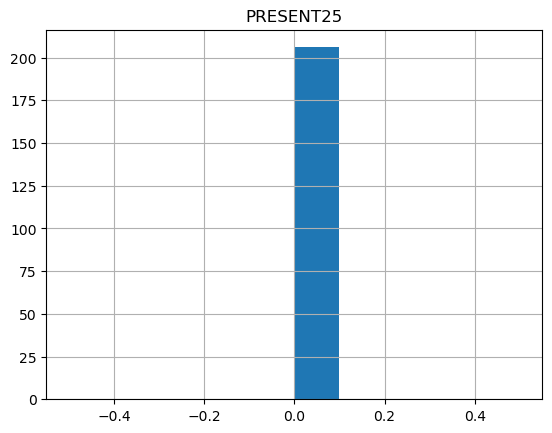

In [58]:
tracts.PRESENT25.hist()

In [ ]:
#Next step is for the choropleth map, will figure out how to include all years (PRESENT90- PRESENT 25)

fig, ax = plt.subplots(figsize=(10, 10))
ax = tracts.plot(ax=ax, column='PRESENT25', cmap='PuBu', linewidth=0.5, edgecolor='black', legend=True)
# store_location_history.plot(ax=ax, markersize=5, color='r', zorder=1)
ax.axis('off')

plt.savefig('large_scale_map.eps')

plt.show()

In [ ]:
#will update 

tracts['[grocery_stores_per_pop]'] = tracts['PRESENT25'] / tracts['[tbd]']


In [65]:
print(store_locations_csv_df.columns.tolist())

['X', 'Y', 'STORENAME', 'ADDRESS', 'ZIPCODE', 'PHONE', 'WARD', 'SSL', 'NOTES', 'PRESENT90', 'PRESENT95', 'PRESENT00', 'PRESENT05', 'PRESENT08', 'PRESENT09', 'PRESENT10', 'PRESENT11', 'PRESENT12', 'PRESENT13', 'PRESENT14', 'PRESENT15', 'PRESENT16', 'PRESENT17', 'PRESENT18', 'PRESENT22', 'PRESENT23', 'PRESENT24', 'PRESENT25', 'GIS_ID', 'XCOORD', 'YCOORD', 'MAR_ID', 'SE_ANNO_CAD_DATA', 'GLOBALID', 'CREATED', 'EDITED', 'OBJECTID']


In [73]:
#Aside from choropleth map, here is some initial groundwork on comparing each grocery store's number of operations
#These findings might be added to a map 


present_columns = [
    'PRESENT90', 'PRESENT95', 'PRESENT00', 'PRESENT05', 'PRESENT08',
    'PRESENT09', 'PRESENT10', 'PRESENT11', 'PRESENT12', 'PRESENT13',
    'PRESENT14', 'PRESENT15', 'PRESENT16', 'PRESENT17', 'PRESENT18',
    'PRESENT22', 'PRESENT23', 'PRESENT24', 'PRESENT25'
]

# Yes counter
store_locations_csv_df['count_yes'] = (store_locations_csv_df[present_columns] == 'Yes').sum(axis=1)

# No counter
store_locations_csv_df['count_no'] = (store_locations_csv_df[present_columns] == 'No').sum(axis=1)

# Blanks-NA counter
#store_locations_csv_df['count_blank'] = (store_locations_csv_df[present_columns] == '').sum(axis=1)

store_locations_csv_df['count_blank'] = (
    (store_locations_csv_df[present_columns] == '') | (store_locations_csv_df[present_columns].isna())
).sum(axis=1)



In [74]:
store_locations_csv_df.head(10)

,X,Y,STORENAME,ADDRESS,ZIPCODE,PHONE,WARD,SSL,NOTES,PRESENT90,...,YCOORD,MAR_ID,SE_ANNO_CAD_DATA,GLOBALID,CREATED,EDITED,OBJECTID,count_yes,count_no,count_blank
0,-8.574604e+06,4.719445e+06,Target,7828 GEORGIA AVENUE NW,20012,2.028924e+09,Ward 4,2960 0017,NaN,NaN,...,146280.07,300512,NaN,{CE302122-4E8D-4DC7-845B-06563B993F66},2022/09/28 22:04:54+00,2025/01/14 19:33:19+00,641,4,0,15
1,-8.574502e+06,4.719303e+06,International Progresso Market,7719 GEORGIA AVENUE NW,20012,2.025455e+09,Ward 4,2961 0810,NaN,NaN,...,146169.97,285417,NaN,{2C18863D-40DE-4F66-AA59-46F1C65D67F2},2022/09/28 22:04:54+00,2025/01/14 19:33:19+00,642,4,0,15
2,-8.574695e+06,4.717056e+06,Jocelyn’s Market,6404 GEORGIA AVENUE NW,20012,2.027228e+09,Ward 4,2945 0839,NaN,NaN,...,144428.00,285334,NaN,{A0B448C3-B3FB-49FE-B8BF-1FEBA3CEA642},2022/09/28 22:04:54+00,2025/01/14 19:33:19+00,643,4,0,15
3,-8.580112e+06,4.716739e+06,Magruder's,5626 CONNECTICUT AVENUE NW,20015,2.024645e+09,Ward 3,1860 0013,,Yes,...,144184.19,263860,NaN,{9ABE1C46-BB48-4110-B5BA-C6363CA3BD7A},2022/09/28 22:04:54+00,2025/01/14 19:33:19+00,644,19,0,0
4,-8.579940e+06,4.716602e+06,Safeway,5545 CONNECTICUT AVENUE NW,20015,2.022446e+09,Ward 3,1867 0092,,No,...,144078.34,263999,NaN,{902F540E-FE16-43A5-8010-CD84E94B28B7},2022/09/28 22:04:54+00,2025/01/14 19:33:19+00,645,18,1,0
5,-8.574638e+06,4.716241e+06,Walmart Supercenter,5929 GEORGIA AVENUE NW,20011,2.027194e+09,Ward 4,2986 0039,Georgia Ave,No,...,143796.02,254296,NaN,{A40991EF-B8F3-44B5-AE35-48BD1C814681},2022/09/28 22:04:54+00,2025/01/14 19:33:19+00,646,10,9,0
6,-8.571840e+06,4.715654e+06,Walmart Supercenter,310 RIGGS ROAD NE,20011,2.027564e+09,Ward 4,3748 0052,Riggs Road,No,...,143340.35,311574,NaN,{4BA6EDB6-4A42-4EBE-B792-63208B1427FE},2022/09/28 22:04:54+00,2025/01/14 19:33:19+00,647,8,11,0
7,-8.573974e+06,4.715457e+06,Tropimart International Foods,607 KENNEDY STREET NW,20011,2.026273e+09,Ward 4,3207 0089,NaN,NaN,...,143188.21,246733,NaN,{4FC86176-5DF9-44E1-B2C2-AFEA77046638},2022/09/28 22:04:54+00,2025/01/14 19:33:19+00,648,1,12,6
8,-8.580936e+06,4.715414e+06,Rodman’s,5100 WISCONSIN AVENUE NW,20016,2.023633e+09,Ward 3,1656 0009,NaN,NaN,...,143157.89,265883,NaN,{572E410A-B3F5-4080-AD0F-CAE80BCBB60A},2022/09/28 22:04:54+00,2025/01/14 19:33:19+00,649,4,0,15
9,-8.572980e+06,4.714706e+06,Avenue Supermarket,5010 1ST STREET NW,20011,2.027261e+09,Ward 4,3403 0806,NaN,NaN,...,142605.69,243587,NaN,{676068FB-DF0B-4A78-896F-774E4BFD51D0},2022/09/28 22:04:54+00,2025/01/14 19:33:19+00,650,4,0,15


In [ ]:
#I will work on building a comparison of grocery stores based on how long they have been open and expanding the choropleth map